<a href="https://www.kaggle.com/code/kbdharun/nlp-tldr-pairs?scriptVersionId=165301514" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Natural language processing and analysis of the TLDR Pages Translation Pairs Dataset

This is a sample base notebook for working with this dataset.

In [1]:
# Importing required libraries
import pandas as pd
import numpy as np
import nltk
import matplotlib.pyplot as plt

# Load and Inspect the Dataset
Load the dataset using pandas and inspect its structure and contents.

In [2]:
# Load the dataset (specify any language pair) into 'dataset' DataFrame
dataset = pd.read_csv('/kaggle/input/tldr-pages-translation-pairs-dataset/tldr-translation-pairs-dataset-csv/en-ta.csv')

In [3]:
# Display the first few rows of the dataset
dataset.head()

,sourceLanguage,targetLanguage,sourceString,targetString
0,en,ta,Android activity manager.,ஆண்ட்ராய்டு செயல்பாட்டு மேலாளர்.
1,en,ta,More information: <https://developer.android.c...,மேலும் விவரத்திற்கு: <https://developer.androi...
2,en,ta,Start the activity with a specific component a...,ஒரு குறிப்பிட்ட செயல்பாட்டைத் தொடங்கவும்
3,en,ta,Start an intent [a]ction and pass [d]ata to it,"ஒரு செயல்பாட்டைத் தொடங்கி, அதற்குத் தரவை அனுப்..."
4,en,ta,Start an activity matching a specific action a...,குறிப்பிட்ட செயலுக்கும் வகைக்கும் பொருந்தும் ச...


In [4]:
# Display the last few rows of the dataset
dataset.tail()

,sourceLanguage,targetLanguage,sourceString,targetString
3441,en,ta,List available distributions,கிடைக்கக்கூடிய விநியோகங்களின் பட்டியல்
3442,en,ta,Export a distribution to a `.tar` file,விநியோகத்தை `.tar` கோப்பிற்கு ஏற்றுமதி செய்யவும்
3443,en,ta,Import a distribution from a `.tar` file,`.tar` கோப்பிலிருந்து விநியோகத்தை இறக்குமதி செய்
3444,en,ta,Change the version of wsl used for the specifi...,குறிப்பிட்ட விநியோகத்திற்கு பயன்படுத்தப்படும் ...
3445,en,ta,Shut down Windows Subsystem for Linux,லினக்ஸிற்கான விண்டோஸ் துணை அமைப்பை மூடவும்


In [5]:
# Display the structure of the dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3446 entries, 0 to 3445
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   sourceLanguage  3446 non-null   object
 1   targetLanguage  3446 non-null   object
 2   sourceString    3446 non-null   object
 3   targetString    3446 non-null   object
dtypes: object(4)
memory usage: 107.8+ KB


In [6]:
# Display summary statistics of the dataset
dataset.describe()

,sourceLanguage,targetLanguage,sourceString,targetString
count,3446,3446,3446,3446
unique,1,1,1426,1440
top,en,ta,View documentation for the original command,அக்கட்டளையின் விளக்கத்தைக் காண
freq,3446,3446,388,386


In [7]:
dataset.shape # Checking the shape of the dataset (rows, columns)

(3446, 4)

# Preprocess the Text Data
Clean and preprocess the text data, including removing punctuation, converting to lowercase, and tokenizing.

In [8]:
# Importing additional required libraries
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import string

# Downloading the NLTK English tokenizer and the stopwords of all languages
nltk.download('punkt')
nltk.download('stopwords')

# Function to preprocess text
def preprocess_text(text):
    # Convert text to lowercase
    text = text.lower()
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Tokenize text
    tokens = word_tokenize(text)
    # Remove stopwords
    tokens = [token for token in tokens if token not in stopwords.words('english')]
    return tokens

# Apply the preprocessing function to the 'source_string' and 'target_string' columns
dataset['sourceString'] = dataset['sourceString'].apply(preprocess_text)
dataset['targetString'] = dataset['targetString'].apply(preprocess_text)

# Display the first few rows of the preprocessed dataset
print(dataset.head())

[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
  sourceLanguage targetLanguage  \
0             en             ta   
1             en             ta   
2             en             ta   
3             en             ta   
4             en             ta   

                                        sourceString  \
0                       [android, activity, manager]   
1  [information, httpsdeveloperandroidcomtoolsadbam]   
2  [start, activity, specific, component, package...   
3                [start, intent, action, pass, data]   
4  [start, activity, matching, specific, action, ...   

                                        targetString  
0                [ஆண்ட்ராய்டு, செயல்பாட்டு, மேலாளர்]  
1  [மேலும், விவரத்திற்கு, httpsdeveloperandroidco...  
2      [ஒரு, குறிப்பிட்ட, செயல்பாட்டைத், தொடங்க

# Perform Text Analysis
Perform various text analysis methods on the preprocessed text data, such as frequency analysis, sentiment analysis, and n-gram analysis.

In [9]:
# Importing additional required libraries
from collections import Counter
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import CountVectorizer

# Downloading the NLTK vader_lexicon
nltk.download('vader_lexicon')

# Function to perform frequency analysis
def frequency_analysis(texts):
    # Flatten the list of texts
    words = [word for text in texts for word in text]
    # Count the frequency of each word
    word_freq = Counter(words)
    # Return the 10 most common words
    return word_freq.most_common(10)

# Perform frequency analysis on the 'source_string' and 'target_string' columns
source_freq = frequency_analysis(dataset['sourceString'])
target_freq = frequency_analysis(dataset['targetString'])

# Print the results
print("Most common words in source texts: ", source_freq)
print("Most common words in target texts: ", target_freq)

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /usr/share/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
Most common words in source texts:  [('command', 920), ('information', 490), ('documentation', 478), ('view', 460), ('original', 408), ('alias', 398), ('gnu', 280), ('files', 272), ('specific', 256), ('file', 246)]
Most common words in target texts:  [('ஒரு', 602), ('மேலும்', 436), ('விவரத்திற்கு', 404), ('பெயர்', 398), ('கட்டளையின்', 392), ('அக்கட்டளையின்', 386), ('விளக்கத்தைக்', 386), ('காண', 386), ('இக்கட்டளை', 384), ('மற்றொருப்', 384)]


/opt/conda/lib/python3.10/site-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [10]:
# Function to perform sentiment analysis
def sentiment_analysis(texts):
    # Initialize the sentiment intensity analyzer
    sia = SentimentIntensityAnalyzer()
    # Compute the sentiment scores
    sentiment_scores = [sia.polarity_scores(' '.join(text)) for text in texts]
    return sentiment_scores

# Perform sentiment analysis on the 'source_string' and 'target_string' columns
source_sentiment = sentiment_analysis(dataset['sourceString'])
target_sentiment = sentiment_analysis(dataset['targetString'])

# Print the results
# print("Sentiment scores of source texts: ", source_sentiment)
# print("Sentiment scores of target texts: ", target_sentiment)

# Function to perform n-gram analysis
def ngram_analysis(texts, n=2):
    # Initialize the count vectorizer with the specified number of n-grams
    vectorizer = CountVectorizer(ngram_range=(n, n))
    # Compute the n-grams
    ngrams = vectorizer.fit_transform([' '.join(text) for text in texts])
    # Return the 10 most common n-grams
    return vectorizer.get_feature_names_out()[:10]

# Perform n-gram analysis on the 'source_string' and 'target_string' columns
source_ngrams = ngram_analysis(dataset['sourceString'])
target_ngrams = ngram_analysis(dataset['targetString'])

# Print the results
print("Most common n-grams in source texts: ", source_ngrams)
print("Most common n-grams in target texts: ", target_ngrams)

Most common n-grams in source texts:  ['10 recent' '10 url' '100 http' '1024 display' '1024byte blocks'
 '1024byte units' '1604 later' '19216804 address' '30 default'
 '32bit 64bit']
Most common n-grams in target texts:  ['10 கம' '10 கள' '100 http' '1000 இன' '1024 இன' '1024எண கள' '1024ப அலக'
 '1604 மற' '19216804 இல' '19af கன']


# Apply Natural Language Processing (NLP) Techniques
Apply various NLP techniques to the text data, such as part-of-speech tagging, named entity recognition, and topic modeling.

In [11]:
# Importing additional required libraries
from nltk import pos_tag
from nltk import ne_chunk
from sklearn.decomposition import LatentDirichletAllocation

# Downloading the NLTK averaged_perceptron_tagger and maxent_ne_chunker
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('words')

# Function to perform part-of-speech tagging
def pos_tagging(texts):
    # Perform part-of-speech tagging
    pos_tags = [pos_tag(text) for text in texts]
    return pos_tags

# Perform part-of-speech tagging on the 'source_string' and 'target_string' columns
dataset['source_pos_tags'] = pos_tagging(dataset['sourceString'])
dataset['target_pos_tags'] = pos_tagging(dataset['targetString'])

# Function to perform named entity recognition
def named_entity_recognition(pos_tags):
    # Perform named entity recognition
    named_entities = [ne_chunk(tag) for tag in pos_tags]
    return named_entities

# Perform named entity recognition on the 'source_pos_tags' and 'target_pos_tags' columns
dataset['source_named_entities'] = named_entity_recognition(dataset['source_pos_tags'])
dataset['target_named_entities'] = named_entity_recognition(dataset['target_pos_tags'])

# Print the 'source_named_entities' column
print(dataset['source_named_entities'])

# Print the 'target_named_entities' column
print(dataset['target_named_entities'])

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /usr/share/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /usr/share/nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to /usr/share/nltk_data...
[nltk_data]   Package words is already up-to-date!
0          [(android, JJ), (activity, NN), (manager, NN)]
1       [(information, NN), (httpsdeveloperandroidcomt...
2       [(start, NN), (activity, NN), (specific, JJ), ...
3       [(start, JJ), (intent, NN), (action, NN), (pas...
4       [(start, NN), (activity, NN), (matching, VBG),...
                              ...                        
3441    [(list, NN), (available, JJ), (distributions, ...
3442    [(export, NN), (distribution, NN), (tar, NN), ...
3443    [(import, NN), (distribution, NN), (tar, NN), ...
3444    [(cha

In [12]:
import gensim
from gensim import corpora
from gensim.models import LdaModel
from pprint import pprint

def topic_modeling(texts, n_topics=5):
    # Create a dictionary representation of the documents
    dictionary = corpora.Dictionary(texts)
    # Convert document into the bag-of-words (BoW) format
    corpus = [dictionary.doc2bow(text) for text in texts]
    # Train the LDA model
    lda_model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=n_topics)
    return lda_model

# Assuming that 'source_string' and 'target_string' are lists of preprocessed texts
source_string = dataset['sourceString'].dropna().tolist()
target_string = dataset['targetString'].dropna().tolist()

# Perform topic modeling
source_model = topic_modeling(source_string)
target_model = topic_modeling(target_string)

# Print the Keyword in the topics
pprint(source_model.print_topics())
pprint(target_model.print_topics())

[(0,
  '0.059*"information" + 0.043*"display" + 0.021*"list" + 0.020*"packages" + '
  '0.017*"help" + 0.014*"package" + 0.013*"run" + 0.012*"files" + '
  '0.011*"specific" + 0.010*"available"'),
 (1,
  '0.089*"command" + 0.085*"view" + 0.085*"documentation" + 0.080*"original" + '
  '0.036*"file" + 0.013*"specific" + 0.012*"print" + 0.012*"package" + '
  '0.009*"checksums" + 0.009*"remove"'),
 (2,
  '0.041*"information" + 0.038*"command" + 0.029*"alias" + 0.022*"files" + '
  '0.019*"show" + 0.016*"gnu" + 0.015*"package" + 0.011*"list" + 0.011*"one" + '
  '0.011*"remove"'),
 (3,
  '0.088*"alias" + 0.086*"command" + 0.075*"gnu" + 0.050*"information" + '
  '0.010*"manager" + 0.009*"package" + 0.008*"installed" + 0.007*"install" + '
  '0.007*"branch" + 0.006*"see"'),
 (4,
  '0.034*"command" + 0.029*"display" + 0.027*"specific" + 0.025*"files" + '
  '0.019*"directory" + 0.018*"alias" + 0.018*"version" + 0.015*"package" + '
  '0.013*"list" + 0.013*"current"')]
[(0,
  '0.049*"ஒரு" + 0.035*"குற

# Visualize the Results
Visualize the results of the text analysis and NLP techniques using matplotlib, including bar charts, word clouds, and heatmaps.

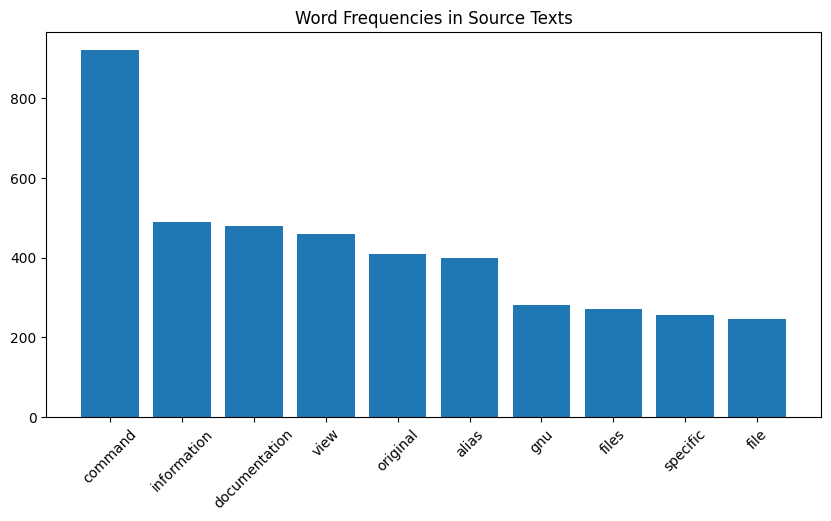

/opt/conda/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 108 (l) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/conda/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 112 (p) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/conda/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 87 (W) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/conda/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 111 (o) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/conda/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 114 (r) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/conda/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 100 (d) missing from current font.
  fig.canvas.print_figure(bytes_io,

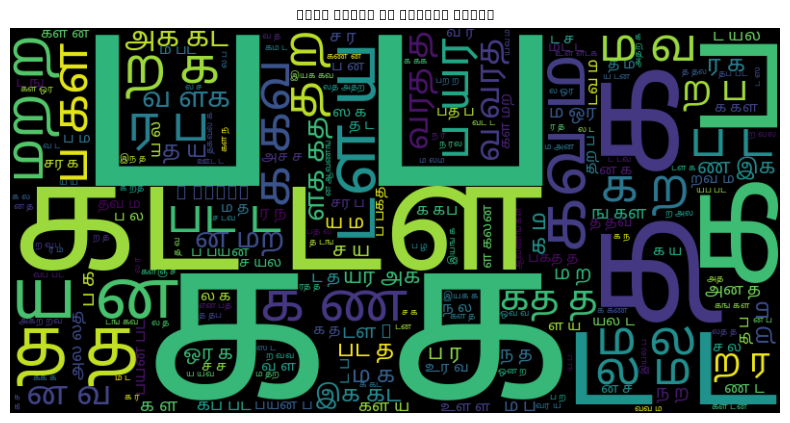

/tmp/ipykernel_18/337182370.py:39: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot([score['compound'] for score in sentiment_scores])
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


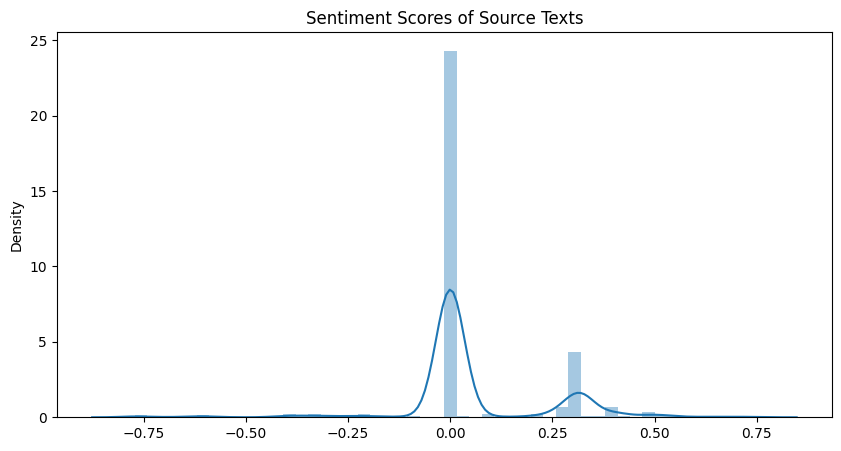

/tmp/ipykernel_18/337182370.py:39: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot([score['compound'] for score in sentiment_scores])
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


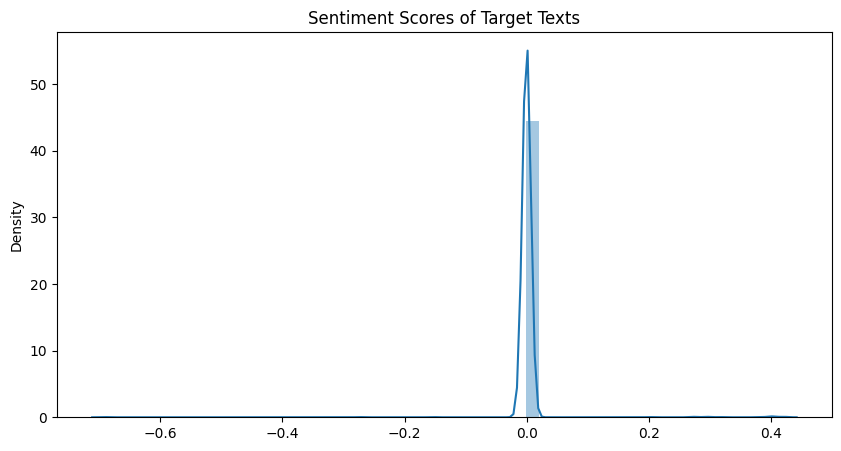

In [13]:
# Importing additional required libraries
from wordcloud import WordCloud
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
# Define the Google Fonts URL for Noto Sans Tamil
tamil_font_url = "https://fonts.gstatic.com/ea/notosanstamil/v4/NotoSansTamil-Regular.ttf"
# Download the font file
import requests
font_path = "NotoSansTamil-Regular.ttf"
response = requests.get(tamil_font_url)
with open(font_path, "wb") as f:
    f.write(response.content)
# Function to plot word frequencies
def plot_word_frequencies(word_freq, title):
    words, frequencies = zip(*word_freq)
    plt.figure(figsize=(10, 5))
    plt.bar(words, frequencies)
    plt.title(title)
    plt.xticks(rotation=45)
    plt.show()
# Plot the word frequencies of the 'sourceString' and 'targetString' columns
plot_word_frequencies(source_freq, "Word Frequencies in Source Texts")
# plot_word_frequencies(target_freq, "Word Frequencies in Target Texts")
# Function to plot word clouds
def plot_word_cloud(texts, title):
    plt.figure(figsize=(10, 5))
    wordcloud = WordCloud(width=800, height=400, font_path=font_path).generate(' '.join([' '.join(text) for text in texts]))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(title, fontproperties=fm.FontProperties(fname=font_path))
    plt.axis("off")
    plt.show()
# Plot the word clouds of the 'sourceString' and 'targetString' columns
# plot_word_cloud(dataset['sourceString'], "Word Cloud of Source Texts")
plot_word_cloud(dataset['targetString'], "Word Cloud of Target Texts")
# Function to plot sentiment scores
def plot_sentiment_scores(sentiment_scores, title):
    plt.figure(figsize=(10, 5))
    sns.distplot([score['compound'] for score in sentiment_scores])
    plt.title(title)
    plt.show()
# Plot the sentiment scores of the 'sourceString' and 'targetString' columns
plot_sentiment_scores(source_sentiment, "Sentiment Scores of Source Texts")
plot_sentiment_scores(target_sentiment, "Sentiment Scores of Target Texts")